### Circuit basics
##### Following along IBM's Qiskit tutorials:
https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html

In [1]:
import numpy as np
from qiskit import QuantumCircuit

%matplotlib inline

In [2]:
# create a quantum circuit with register n = 3 qubits
circ = QuantumCircuit(3)

##### Now we can add gates:

In [3]:
# Hadamard gate on qubit 0
circ.h(0)

In [4]:
# CX (CNOT) gate on control qubit 0 and target qubit 1 (create Bell state)
circ.cx(0,1)

In [5]:
# CX (CNOT) on control qubit 0 and target qubit 2 (create GHZ state)
circ.cx(0,2)

In [6]:
#draw the circuit
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

### Now we can simulate circuits

In [7]:
from qiskit.quantum_info import Statevector

In [8]:
# set initial state to ground state using from_int
state = Statevector.from_int(0,2**3)

In [9]:
# evolve the state by the quantum circuit
state = state.evolve(circ)

In [10]:
state.draw('latex')

<IPython.core.display.Latex object>

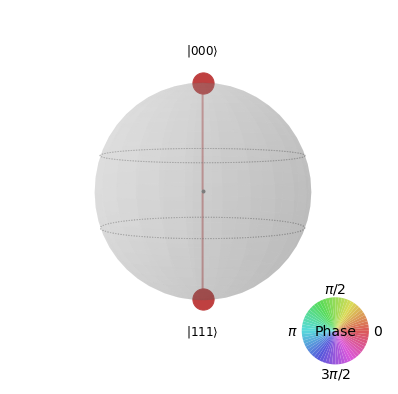

In [11]:
state.draw('qsphere')

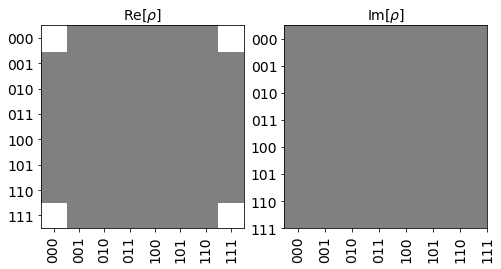

In [12]:
state.draw('hinton')

### Unitary representation of a circuit

In [13]:
from qiskit.quantum_info import Operator

In [14]:
U = Operator(circ)

# show results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

### OpenQASM backend

In [15]:
# create a quantum circuit
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
#map quantum measurement to the classical bits
meas.measure(range(3),range(3))

In [16]:
# the Qiskit circuit object supports composition
# here the meas has to be first
# and front=True (putting it before)
# since compose is putting a smaller circuit into a bigger one
qc = meas.compose(circ, range(3), front = True)

In [20]:
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

#### Engaging the simulator:

In [21]:
from qiskit import transpile

In [22]:
# Aer qasm_simulator
from qiskit.providers.aer import QasmSimulator

In [24]:
# instantiate
backend = QasmSimulator()

In [27]:
# first we transpile the quantum circuit
# so the backend can use it
qc_compiled = transpile(qc,backend)

# then we execute the circuit
job_sim = backend.run(qc_compiled, shots = 1024)

# then grab the results
result_sim = job_sim.result()

In [29]:
counts = result_sim.get_counts(qc_compiled)
counts

{'111': 487, '000': 537}

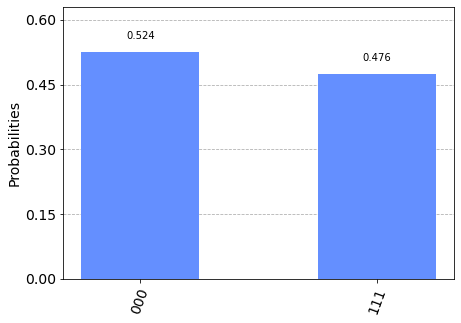

In [30]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [31]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright